In [53]:
import numpy as np
from matplotlib import pyplot as plt

L=1
Nx=103
D=10**(-6)
dt=100*D
t_final=500000*D
x_ax=np.linspace(0,L+L/(Nx-1),Nx+1)
dx=x_ax[1]-x_ax[0]
t_ax=np.arange(0,t_final+dt,dt)
print(dx,dt)

bcdl=1
bcdr=0
C0=0
grid=np.zeros((len(t_ax),len(x_ax)))
grid[:,0]=bcdl
s=dt/(dx**2)
s=s/2
print(s)

0.00980392156862745 9.999999999999999e-05
0.5201999999999999


In [54]:
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    #xc[0]=1
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [55]:
def analytic(x, t):
    result = 1
    for n in range(1001):
        result -= 2*(-1)**n/((n+0.5)*np.pi)*np.cos((n+0.5)*np.pi*(1-x))*np.exp(-(n+1/2)**2*np.pi*np.pi*t)
    return result

[1.00000000e+00 6.24662976e-01 3.42446939e-01 1.40799812e-01
 5.14586442e-02 1.76313627e-02 5.79942123e-03 1.85459451e-03
 5.80976339e-04 1.79154819e-04 5.45636624e-05 1.64518115e-05
 4.91948697e-06 1.46082922e-06 4.31222744e-07 1.26643356e-07
 3.70278641e-08 1.07838820e-08 3.12979749e-09 9.05555060e-10
 2.61281574e-10 7.51996138e-11 2.15941704e-11 6.18812683e-12
 1.76994650e-12 5.05366482e-13 1.44064608e-13 4.10076842e-14
 1.16567381e-14 3.30928776e-15 9.38372598e-16 2.65786724e-16
 7.52036805e-17 2.12579110e-17 6.00348030e-18 1.69398572e-18
 4.77597152e-19 1.34548382e-19 3.78772010e-20 1.06555634e-20
 2.99563798e-21 8.41648438e-22 2.36327185e-22 6.63208945e-23
 1.86016781e-23 5.21470192e-24 1.46114169e-24 4.09213439e-25
 1.14554141e-25 3.20540688e-26 8.96550209e-27 2.50664202e-27
 7.00556248e-28 1.95719034e-28 5.46598558e-29 1.52600142e-29
 4.25890354e-30 1.18823451e-30 3.31415507e-31 9.24090213e-32
 2.57591268e-32 7.17839330e-33 1.99989241e-33 5.57022860e-34
 1.55106490e-34 4.317982

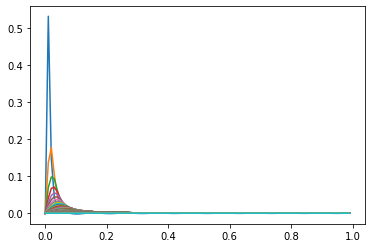

In [68]:
a=np.full(Nx-1,-s)
a[-1]+=-s
b=np.full(Nx,(1+2*s))
b[0]=1
c=np.full(Nx-1,-s)
c[0]=0
d=np.zeros(Nx)
dn=np.zeros(Nx)
dn[0]=1
d[0]=1
for t in range(len(t_ax)-1):
    for i in range(1,len(d)-1):
        dn[i]=s*d[i-1]+(1-2*s)*d[i]+s*d[i+1]
        dn[-1]=2*s*d[-2]+(1-2*s)*d[-1]
    d=dn
    d=TDMAsolver(a,b,c,d)
    d[0]=1
    
    if(t==1):
        print(d)
    #if(t%101==0):
        #plt.plot(x_ax[0:Nx],d)
    plt.plot(x_ax[0:Nx-1],d[0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))
print(d)